# SUMMER ANALYTICS 2025 - CAPSTONE PROJECT 2025

In [11]:
!pip install pathway


IMPORT Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import layout
from bokeh.io import push_notebook
import pathway as pw

In [13]:
output_notebook()

Load Dataset

In [14]:
df = pd.read_csv('/content/dataset.csv')


In [15]:
print(df.shape)

(18368, 12)


In [16]:
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [18]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


# **Model 1: Baseline Linear Model**
- Price increases linearly with occupancy rate

Example -

 P_{t+1} = P_t + alpha * (Occupancy / Capacity)


In [19]:
df['Timestamp'] = pd.to_datetime(
    df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
    format='%d-%m-%Y %H:%M:%S'
)

In [20]:
df_sorted = df.sort_values(by=['SystemCodeNumber', 'Timestamp']).copy()


In [21]:
df_sorted

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,2016-10-04 08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,2016-10-04 08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,2016-10-04 09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,2016-10-04 09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00,2016-12-19 14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00,2016-12-19 15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00,2016-12-19 15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00,2016-12-19 16:03:00


Basic Configuration


In [22]:
alpha = 0.3
base_price = 10.0
min_price = 5.0
max_price = 20.0

In [23]:
#applying pricing logic per parking lo
baseline_prices = []

In [24]:
for lot_id, lot_data in df_sorted.groupby('SystemCodeNumber'):
    price = base_price
    lot_prices = []

    for _, row in lot_data.iterrows():
        occupancy_ratio = row['Occupancy'] / row['Capacity']
        price += alpha * occupancy_ratio
        price = max(min_price, min(price, max_price))
        lot_prices.append(price)

    baseline_prices.extend(lot_prices)

In [25]:
# BaselinePrice to your dataframe
df_sorted['BaselinePrice'] = baseline_prices


In [26]:
#results preview
df_sorted[['SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity', 'BaselinePrice']].head(10)


,SystemCodeNumber,Timestamp,Occupancy,Capacity,BaselinePrice
0,BHMBCCMKT01,2016-10-04 07:59:00,61,577,10.031716
1,BHMBCCMKT01,2016-10-04 08:25:00,64,577,10.064991
2,BHMBCCMKT01,2016-10-04 08:59:00,80,577,10.106586
3,BHMBCCMKT01,2016-10-04 09:32:00,107,577,10.162218
4,BHMBCCMKT01,2016-10-04 09:59:00,150,577,10.240208
5,BHMBCCMKT01,2016-10-04 10:26:00,177,577,10.332236
6,BHMBCCMKT01,2016-10-04 10:59:00,219,577,10.446101
7,BHMBCCMKT01,2016-10-04 11:25:00,247,577,10.574523
8,BHMBCCMKT01,2016-10-04 11:59:00,259,577,10.709185
9,BHMBCCMKT01,2016-10-04 12:29:00,266,577,10.847487


In [27]:
first_lot = df_sorted['SystemCodeNumber'].unique()[0]
df_lot = df_sorted[df_sorted['SystemCodeNumber'] == first_lot]

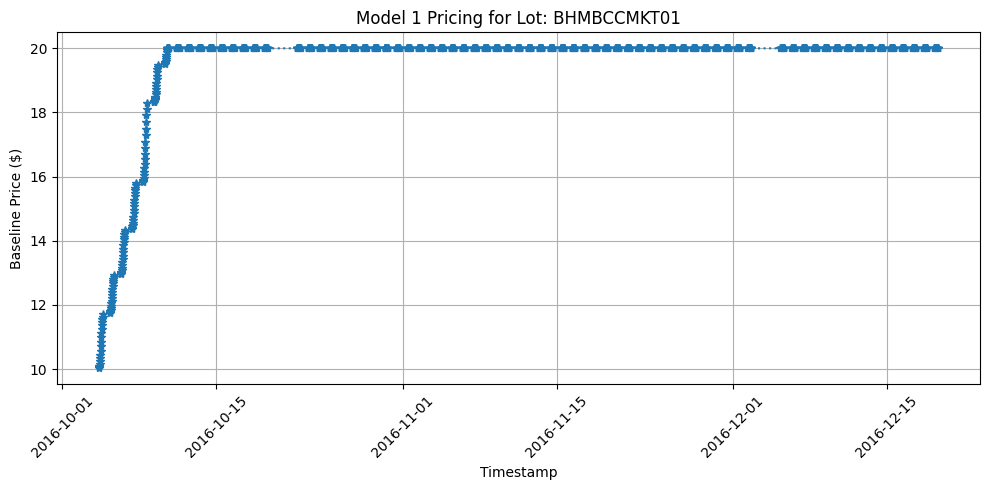

In [28]:
 #Plot price over time
plt.figure(figsize=(10, 5))
plt.plot(df_lot['Timestamp'], df_lot['BaselinePrice'], marker='*', linestyle=':')
plt.title(f"Model 1 Pricing for Lot: {first_lot}")
plt.xlabel("Timestamp")
plt.ylabel("Baseline Price ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bokeh

In [29]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import layout
output_notebook()

In [30]:
source = ColumnDataSource(df_lot)


In [31]:
p = figure(x_axis_type='datetime', title=f"Model 1 Pricing for Lot: {first_lot}",
           width=900, height=400)
p.line('Timestamp', 'BaselinePrice', source=source, line_width=2, color='navy', legend_label="Baseline Price")
p.scatter('Timestamp', 'BaselinePrice', source=source, size=5, color='pink')

GlyphRenderer(id='8430d831-2be2-4763-abbc-2eb2f8eff0b3', ...)

In [32]:
#style plot
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Price ($)'
p.legend.location = 'top_left'
p.grid.grid_line_alpha = 0.3

In [33]:
show(p)

### Comparing Parking Pricing

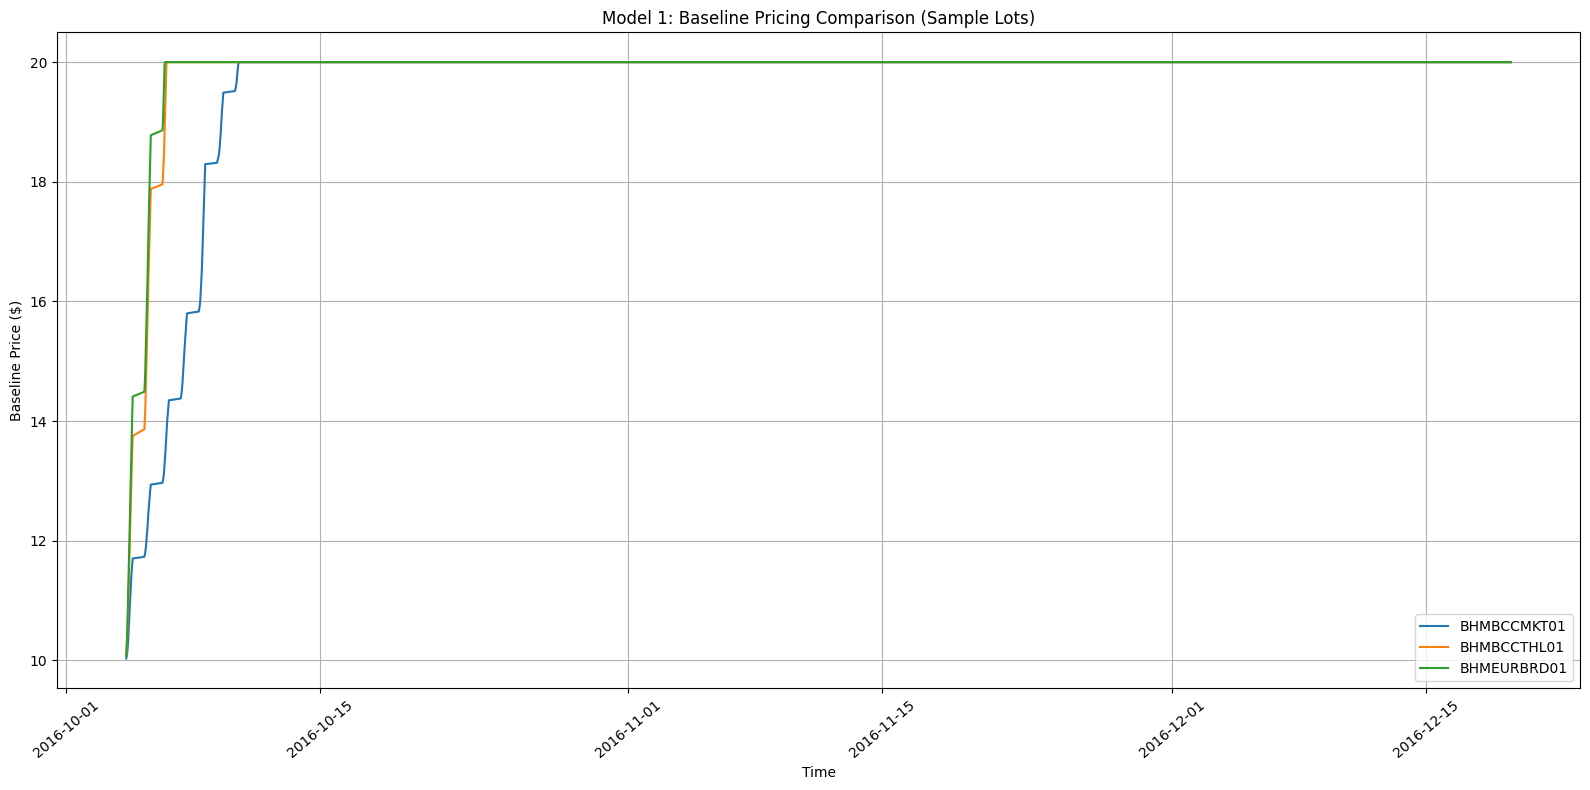

In [34]:
sample_lots = df_sorted['SystemCodeNumber'].unique()[:3]

plt.figure(figsize=(16, 8))

for lot in sample_lots:
    lot_data = df_sorted[df_sorted['SystemCodeNumber'] == lot]
    plt.plot(lot_data['Timestamp'], lot_data['BaselinePrice'], label=lot)

plt.title("Model 1: Baseline Pricing Comparison (Sample Lots)")
plt.xlabel("Time")
plt.ylabel("Baseline Price ($)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [35]:
df_sorted['Revenue'] = df_sorted['Occupancy'] * df_sorted['BaselinePrice']
#revenue

In [36]:
df_sorted[['SystemCodeNumber', 'Timestamp', 'Occupancy', 'BaselinePrice', 'Revenue']].head(10)


,SystemCodeNumber,Timestamp,Occupancy,BaselinePrice,Revenue
0,BHMBCCMKT01,2016-10-04 07:59:00,61,10.031716,611.934662
1,BHMBCCMKT01,2016-10-04 08:25:00,64,10.064991,644.159445
2,BHMBCCMKT01,2016-10-04 08:59:00,80,10.106586,808.526863
3,BHMBCCMKT01,2016-10-04 09:32:00,107,10.162218,1087.357366
4,BHMBCCMKT01,2016-10-04 09:59:00,150,10.240208,1536.031196
5,BHMBCCMKT01,2016-10-04 10:26:00,177,10.332236,1828.805719
6,BHMBCCMKT01,2016-10-04 10:59:00,219,10.446101,2287.696014
7,BHMBCCMKT01,2016-10-04 11:25:00,247,10.574523,2611.907279
8,BHMBCCMKT01,2016-10-04 11:59:00,259,10.709185,2773.679029
9,BHMBCCMKT01,2016-10-04 12:29:00,266,10.847487,2885.431542


In [37]:
model1_output = df_sorted[['SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity', 'BaselinePrice', 'Revenue']]


In [38]:
model1_output.to_csv("Model1_Baseline_Linear_Model_output.csv", index=False)


# **Model 2: Demand-Based Model**

 -Demand is a weighted combination of:
  - Occupancy rate
  - Queue length
  - Traffic level
  - Special day indicator
  - Vehicle type
  - Normalized demand scales price around base

Example -
 P_t = BasePrice * (1 + lambda * NormalizedDemand)


In [39]:
df['VehicleType'].unique()


array(['car', 'bike', 'truck', 'cycle'], dtype=object)

In [40]:
vehicle_weights = {
    'bike': 0.5,
    'car': 1.0,
    'truck': 1.5,
    'cycle': 0.7
}

In [41]:
#traffic condition
traffic_levels = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'average': 1  # to treat 'average' like 'medium'
}

In [42]:
df_model2 = df_sorted.copy()


In [43]:
df_model2['VehicleTypeWeight'] = df_model2['VehicleType'].map(vehicle_weights)
df_model2['TrafficLevel'] = df_model2['TrafficConditionNearby'].map(traffic_levels)

In [44]:
df_model2[['VehicleType', 'VehicleTypeWeight', 'TrafficConditionNearby', 'TrafficLevel']].head(5)


,VehicleType,VehicleTypeWeight,TrafficConditionNearby,TrafficLevel
0,car,1.0,low,0
1,car,1.0,low,0
2,car,1.0,low,0
3,car,1.0,low,0
4,bike,0.5,low,0


In [45]:
#weights
alpha = 1.0
beta = 0.5
gamma = 0.3
delta = 1.0
epsilon = 0.2

In [46]:
df_model2['OccupancyRatio'] = df_model2['Occupancy'] / df_model2['Capacity']
#occupany ratio

In [47]:
# Calculate raw demand score
df_model2['RawDemand'] = (
    alpha   * df_model2['OccupancyRatio'] +
    beta    * df_model2['QueueLength'] -
    gamma   * df_model2['TrafficLevel'] +
    delta   * df_model2['IsSpecialDay'] +
    epsilon * df_model2['VehicleTypeWeight']
)

In [48]:

df_model2[['Occupancy', 'Capacity', 'OccupancyRatio', 'QueueLength', 'TrafficLevel',
           'IsSpecialDay', 'VehicleTypeWeight', 'RawDemand']].head(5)

,Occupancy,Capacity,OccupancyRatio,QueueLength,TrafficLevel,IsSpecialDay,VehicleTypeWeight,RawDemand
0,61,577,0.105719,1,0,0,1.0,0.805719
1,64,577,0.110919,1,0,0,1.0,0.810919
2,80,577,0.138648,2,0,0,1.0,1.338648
3,107,577,0.185442,2,0,0,1.0,1.385442
4,150,577,0.259965,2,0,0,0.5,1.359965


In [49]:
raw_min = df_model2['RawDemand'].min()
raw_max = df_model2['RawDemand'].max()
df_model2['NormalizedDemand'] = (df_model2['RawDemand'] - raw_min) / (raw_max - raw_min)
# Preview
df_model2[['RawDemand', 'NormalizedDemand']].head(5)

,RawDemand,NormalizedDemand
0,0.805719,0.077414
1,0.810919,0.078000
2,1.338648,0.137496
3,1.385442,0.142772
4,1.359965,0.139900


### Compute Final Price Using Normalized Demand




In [53]:
base_price = 10.0
lambda_ = 1.0
min_price = 5.0
max_price = 20.0

In [54]:
df_model2['Model2Price'] = base_price * (1 + lambda_ * df_model2['NormalizedDemand'])
# Clip the price between min and max bounds
df_model2['Model2Price'] = df_model2['Model2Price'].clip(lower=min_price, upper=max_price)
# Preview result
df_model2[['NormalizedDemand', 'Model2Price']].head(10)

,NormalizedDemand,Model2Price
0,0.077414,10.774137
1,0.078000,10.779999
2,0.137496,11.374963
3,0.142772,11.427719
4,0.139900,11.398996
5,0.212819,12.128194
6,0.333766,13.337661
7,0.305415,13.054150
8,0.300995,13.009952
9,0.433142,14.331418


## Plotting Model2Price vs Model1Price Over Time


In [55]:
sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

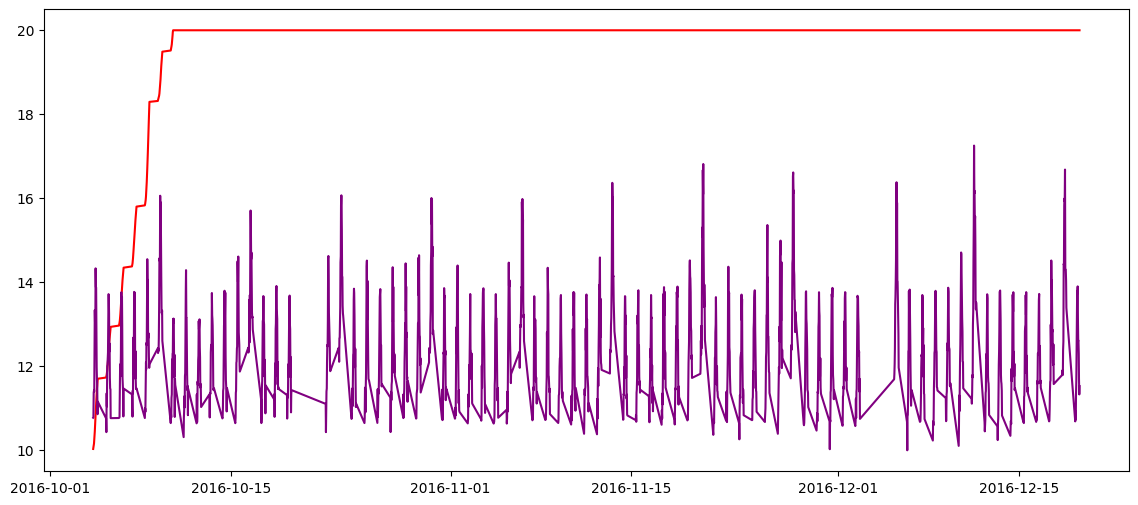

In [63]:
plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['BaselinePrice'], label='Model 1: Linear', color='red')
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='Model 2: Demand-Based', color='purple', linestyle='-')

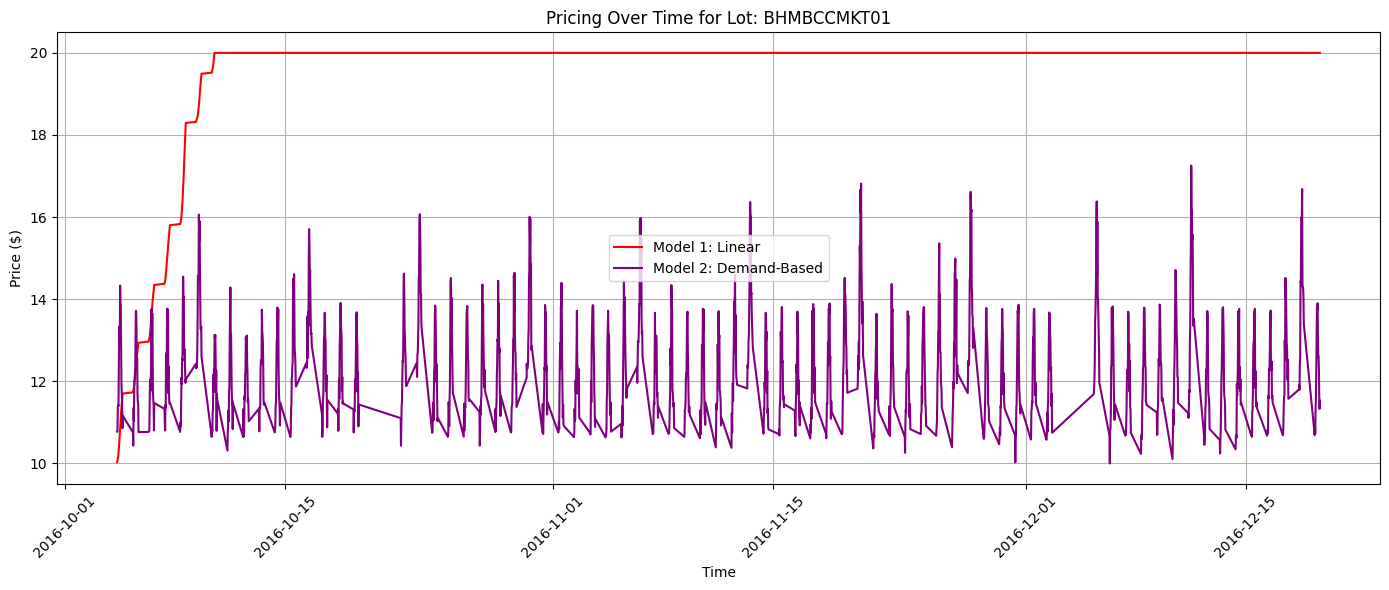

In [64]:
import matplotlib.pyplot as plt


sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['BaselinePrice'], label='Model 1: Linear', color='red')
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='Model 2: Demand-Based', color='purple', linestyle='-')

plt.title(f"Pricing Over Time for Lot: {sample_lot}")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
df_model2['Hour'] = pd.to_datetime(df_model2['Timestamp']).dt.hour
df_model2['DayOfWeek'] = pd.to_datetime(df_model2['LastUpdatedDate'], format='%d-%m-%Y').dt.dayofweek

df_model2['IsOfficeHour'] = df_model2['Hour'].between(9, 17).astype(int)
df_model2['IsWeekend'] = df_model2['DayOfWeek'].isin([5, 6]).astype(int)

In [66]:
zeta = 0.8
eta = 0.6

In [68]:
df_model2['RawDemand'] = (
    alpha   * df_model2['OccupancyRatio'] +
    beta    * df_model2['QueueLength'] -
    gamma   * df_model2['TrafficLevel'] +
    delta   * df_model2['IsSpecialDay'] +
    epsilon * df_model2['VehicleTypeWeight'] +
    zeta    * df_model2['IsWeekend'] +
    eta     * df_model2['IsOfficeHour'])

In [69]:
raw_min = df_model2['RawDemand'].min()
raw_max = df_model2['RawDemand'].max()
df_model2['NormalizedDemand'] = (df_model2['RawDemand'] - raw_min) / (raw_max - raw_min)

In [70]:
df_model2['Model2Price'] = base_price * (1 + lambda_ * df_model2['NormalizedDemand'])
df_model2['Model2Price'] = df_model2['Model2Price'].clip(lower=min_price, upper=max_price)

In [71]:
df_model2['Model2Revenue'] = df_model2['Model2Price'] * df_model2['Occupancy']


In [72]:
df_model2[['Timestamp', 'IsWeekend', 'IsOfficeHour', 'RawDemand', 'NormalizedDemand', 'Model2Price']].head()


,Timestamp,IsWeekend,IsOfficeHour,RawDemand,NormalizedDemand,Model2Price
0,2016-10-04 07:59:00,0,0,0.805719,0.072114,10.721141
1,2016-10-04 08:25:00,0,0,0.810919,0.072660,10.726602
2,2016-10-04 08:59:00,0,0,1.338648,0.128084,11.280836
3,2016-10-04 09:32:00,0,1,1.985442,0.196011,11.960114
4,2016-10-04 09:59:00,0,1,1.959965,0.193336,11.933358


In [73]:
df_model2['Model2Price_PreEnhancement'] = df_model2['Model2Price']


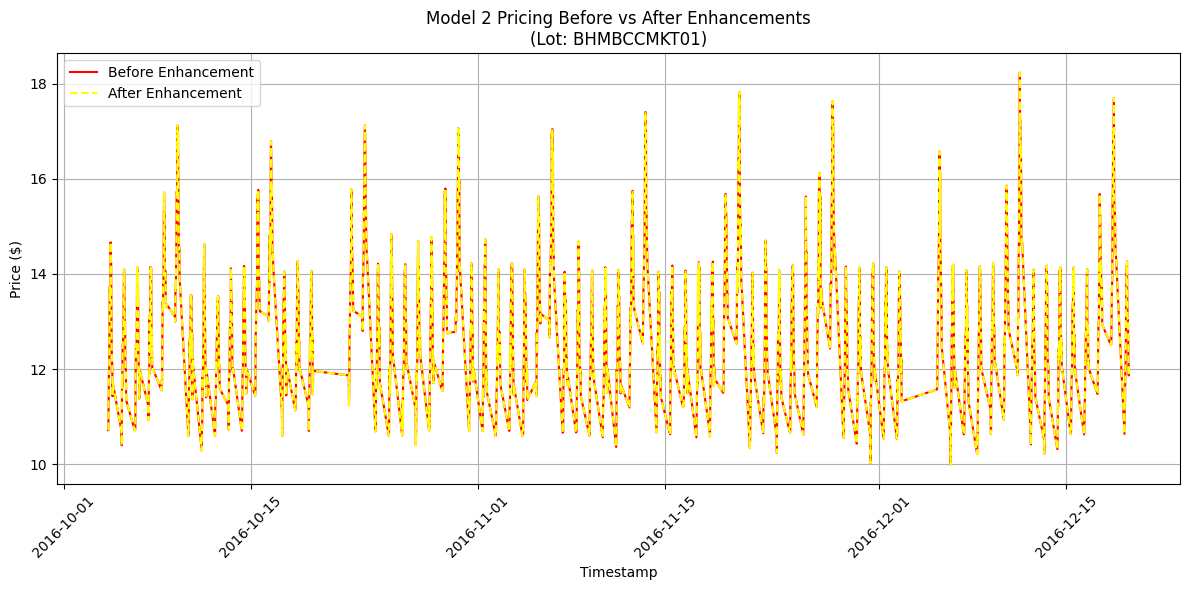

In [76]:
import matplotlib.pyplot as plt

# Pick a parking lot
sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

plt.figure(figsize=(12, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model2Price_PreEnhancement'], label='Before Enhancement', color='red')
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='After Enhancement', color='yellow', linestyle='--')

plt.title(f"Model 2 Pricing Before vs After Enhancements\n(Lot: {sample_lot})")
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-78-168888758.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(lot_data['Timestamp'], rotation=45)


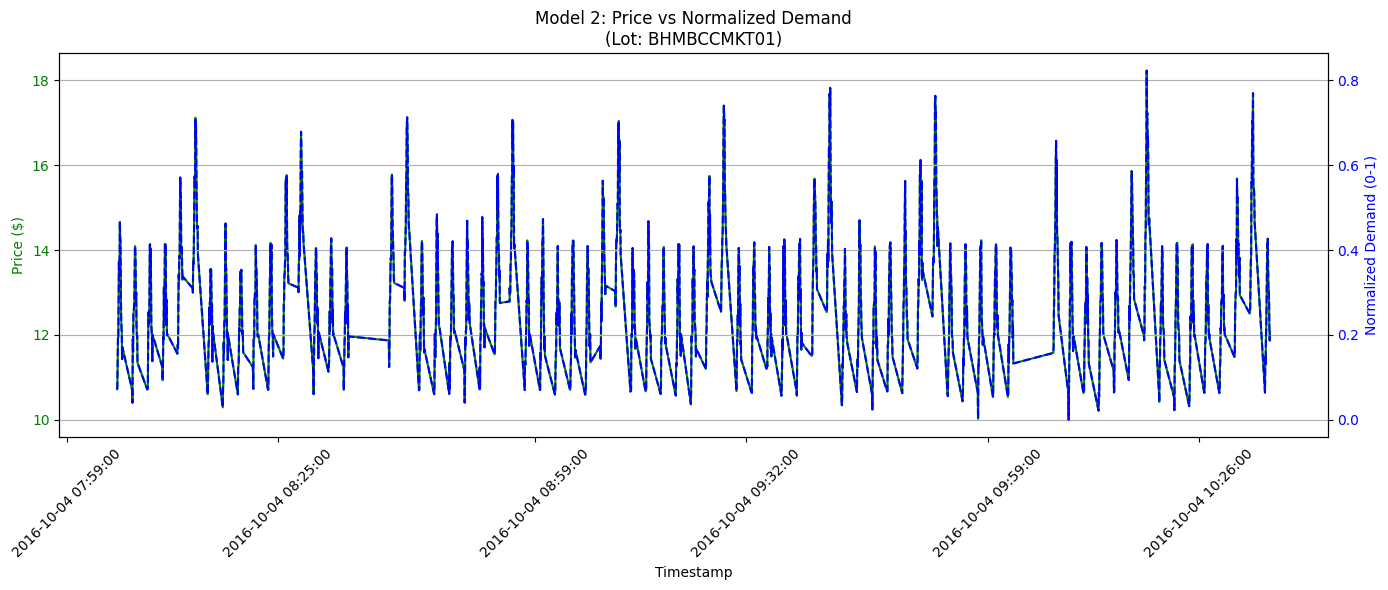

In [78]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Price line
ax1.plot(lot_data['Timestamp'], lot_data['Model2Price'], color='green', label='Model2 Price')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Price ($)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(lot_data['Timestamp'], rotation=45)

# Demand line on secondary axis
ax2 = ax1.twinx()
ax2.plot(lot_data['Timestamp'], lot_data['NormalizedDemand'], color='blue', linestyle='--', label='Normalized Demand')
ax2.set_ylabel('Normalized Demand (0-1)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title(f"Model 2: Price vs Normalized Demand\n(Lot: {sample_lot})")
fig.tight_layout()
plt.grid(True)
plt.show()

In [79]:
model2_export = df_model2[[
    'SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity',
    'QueueLength', 'TrafficConditionNearby', 'IsSpecialDay', 'VehicleType',
    'IsWeekend', 'IsOfficeHour', 'Model2Price', 'Model2Revenue'
]]

# Lets export to CSV
model2_export.to_csv("model2_Demand_Based_Price_Function_pricing_output.csv", index=False)

## Bokeh Plot: Model2Price + NormalizedDemand


In [80]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.layouts import column

output_notebook()

In [82]:
source = ColumnDataSource(lot_data)


# Create figure with datetime x-axis
p = figure(
    x_axis_type="datetime",
    title=f"Enhanced Model 2: Price vs Normalized Demand (Lot: {sample_lot})",
    width=1000,
    height=400)

In [83]:
p.line(x='Timestamp', y='Model2Price', source=source, color='green', line_width=2, legend_label="Model2 Price")
p.scatter(x='Timestamp', y='Model2Price', source=source, size=4, color='green')

GlyphRenderer(id='1b59a3f7-849d-43ac-97e7-f39f37df8b6b', ...)

In [84]:
p.extra_y_ranges = {"demand": Range1d(start=0, end=1.1)}
p.add_layout(LinearAxis(y_range_name="demand", axis_label="Normalized Demand"), 'right')
p.line(x='Timestamp', y='NormalizedDemand', source=source, y_range_name="demand", color='blue', line_dash='dashed', line_width=2, legend_label="Normalized Demand")

GlyphRenderer(id='834b0210-1878-40b5-94a3-d95f386f1108', ...)

In [85]:
p.yaxis.axis_label = "Price ($)"
p.xaxis.axis_label = "Time"
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.grid.grid_line_alpha = 0.3

show (p)

# Model 3:  Competitive Pricing

-Considers nearby lot prices and location to adjust prices competitively

-Suggests rerouting or price reduction when competition is cheaper nearby

In [87]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate distance between two points on Earth (in km)
    """
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    return R * 2 * np.arcsin(np.sqrt(a))


In [88]:
lot_coords = df_model2.groupby('SystemCodeNumber')[['Latitude', 'Longitude']].first().reset_index()

radius_km = 2.0  # 2 km range
neighbor_dict = {}

for i, row1 in lot_coords.iterrows():
    neighbors = []
    for j, row2 in lot_coords.iterrows():
        if row1['SystemCodeNumber'] == row2['SystemCodeNumber']:
            continue
        distance = haversine(row1['Latitude'], row1['Longitude'], row2['Latitude'], row2['Longitude'])
        if distance <= radius_km:
            neighbors.append(row2['SystemCodeNumber'])
    neighbor_dict[row1['SystemCodeNumber']] = neighbors

In [89]:
for lot_id in list(neighbor_dict.keys())[:5]:
    print(f"Lot {lot_id} has {len(neighbor_dict[lot_id])} competitors: {neighbor_dict[lot_id]}")

Lot BHMBCCMKT01 has 12 competitors: ['BHMBCCTHL01', 'BHMEURBRD01', 'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']
Lot BHMBCCTHL01 has 12 competitors: ['BHMBCCMKT01', 'BHMEURBRD01', 'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']
Lot BHMEURBRD01 has 12 competitors: ['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']
Lot BHMMBMMBX01 has 0 competitors: []
Lot BHMNCPHST01 has 12 competitors: ['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a', 'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202', 'Others-CCCPS8', 'Others-CCCPS98', 'Shopping']


In [90]:
#competitor average
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

lot_coords = df_model2.groupby('SystemCodeNumber')[['Latitude', 'Longitude']].first().reset_index()

neighbor_dict = {}
radius_km = 2.0

for i, lot1 in lot_coords.iterrows():
    neighbors = []
    for j, lot2 in lot_coords.iterrows():
        if lot1['SystemCodeNumber'] == lot2['SystemCodeNumber']:
            continue
        distance = haversine(lot1['Latitude'], lot1['Longitude'], lot2['Latitude'], lot2['Longitude'])
        if distance <= radius_km:
            neighbors.append(lot2['SystemCodeNumber'])
    neighbor_dict[lot1['SystemCodeNumber']] = neighbors

In [91]:

from tqdm import tqdm
import numpy as np

df_model2['NearbyAvgPrice'] = np.nan
df_model2['NearbyAvgOccupancyRatio'] = np.nan

for idx in tqdm(df_model2.index):
    row = df_model2.loc[idx]
    lot_id = row['SystemCodeNumber']
    timestamp = row['Timestamp']
    neighbors = neighbor_dict.get(lot_id, [])

    competitors = df_model2[
        (df_model2['SystemCodeNumber'].isin(neighbors)) &
        (df_model2['Timestamp'] == timestamp)
    ]

    if not competitors.empty:
        df_model2.at[idx, 'NearbyAvgPrice'] = competitors['Model2Price'].mean()
        df_model2.at[idx, 'NearbyAvgOccupancyRatio'] = (competitors['Occupancy'] / competitors['Capacity']).mean()
    else:
        df_model2.at[idx, 'NearbyAvgPrice'] = row['Model2Price']
        df_model2.at[idx, 'NearbyAvgOccupancyRatio'] = row['Occupancy'] / row['Capacity']

100%|██████████| 18368/18368 [00:51<00:00, 356.21it/s]


In [92]:
df_model2[['SystemCodeNumber', 'Timestamp', 'Model2Price', 'NearbyAvgPrice', 'Occupancy', 'NearbyAvgOccupancyRatio']].head(10)


,SystemCodeNumber,Timestamp,Model2Price,NearbyAvgPrice,Occupancy,NearbyAvgOccupancyRatio
0,BHMBCCMKT01,2016-10-04 07:59:00,10.721141,11.336596,61,0.271742
1,BHMBCCMKT01,2016-10-04 08:25:00,10.726602,11.446810,64,0.330019
2,BHMBCCMKT01,2016-10-04 08:59:00,11.280836,11.670132,80,0.417660
3,BHMBCCMKT01,2016-10-04 09:32:00,11.960114,12.610956,107,0.508493
4,BHMBCCMKT01,2016-10-04 09:59:00,11.933358,12.703115,150,0.572911
5,BHMBCCMKT01,2016-10-04 10:26:00,12.612636,13.268749,177,0.619829
6,BHMBCCMKT01,2016-10-04 10:59:00,13.739306,13.623605,219,0.666048
7,BHMBCCMKT01,2016-10-04 11:25:00,13.475203,14.240657,247,0.681926
8,BHMBCCMKT01,2016-10-04 11:59:00,13.434031,14.251257,259,0.692018
9,BHMBCCMKT01,2016-10-04 12:29:00,14.665031,15.609927,266,0.695715


In [93]:
beta = 2.0

df_model2['Model3Price'] = (
    0.6 * df_model2['Model2Price'] +
    0.4 * df_model2['NearbyAvgPrice'] +
    beta * df_model2['NearbyAvgOccupancyRatio']
)

df_model2['Model3Price'] = df_model2['Model3Price'].clip(lower=5.0, upper=20.0)
df_model2['Model3Revenue'] = df_model2['Model3Price'] * df_model2['Occupancy']


df_model2[['SystemCodeNumber', 'Timestamp', 'Model2Price', 'Model3Price', 'Model3Revenue']].head(10)

,SystemCodeNumber,Timestamp,Model2Price,Model3Price,Model3Revenue
0,BHMBCCMKT01,2016-10-04 07:59:00,10.721141,11.510807,702.159216
1,BHMBCCMKT01,2016-10-04 08:25:00,10.726602,11.674723,747.182274
2,BHMBCCMKT01,2016-10-04 08:59:00,11.280836,12.271875,981.750003
3,BHMBCCMKT01,2016-10-04 09:32:00,11.960114,13.237437,1416.405774
4,BHMBCCMKT01,2016-10-04 09:59:00,11.933358,13.387083,2008.062449
5,BHMBCCMKT01,2016-10-04 10:26:00,12.612636,14.114739,2498.308861
6,BHMBCCMKT01,2016-10-04 10:59:00,13.739306,15.025122,3290.501769
7,BHMBCCMKT01,2016-10-04 11:25:00,13.475203,15.145236,3740.873205
8,BHMBCCMKT01,2016-10-04 11:59:00,13.434031,15.144958,3922.544132
9,BHMBCCMKT01,2016-10-04 12:29:00,14.665031,16.434419,4371.555491


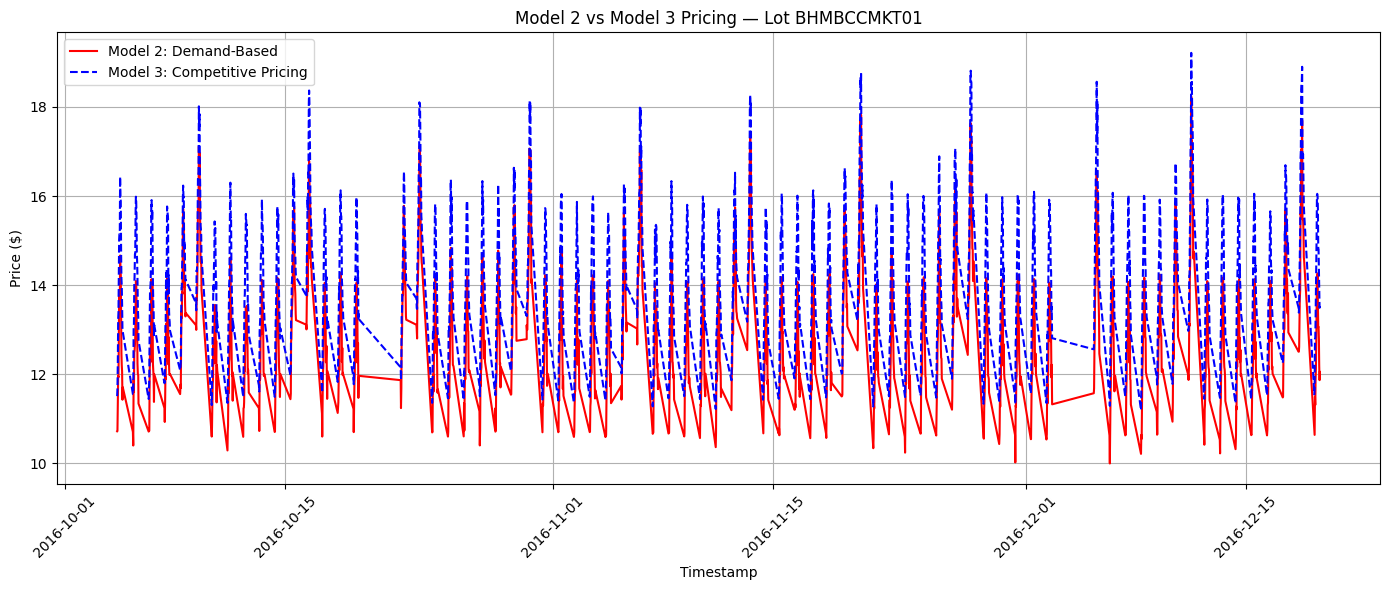

In [96]:
# Model2Price vs Model3Price
import matplotlib.pyplot as plt

# Pick parking lot
sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot]

plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model2Price'], label='Model 2: Demand-Based', color='red')
plt.plot(lot_data['Timestamp'], lot_data['Model3Price'], label='Model 3: Competitive Pricing', color='blue', linestyle='--')

plt.title(f"Model 2 vs Model 3 Pricing — Lot {sample_lot}")
plt.xlabel("Timestamp")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

sample_lot = df_model2['SystemCodeNumber'].unique()[0]
lot_data = df_model2[df_model2['SystemCodeNumber'] == sample_lot].copy()

lot_data['Timestamp'] = pd.to_datetime(lot_data['Timestamp'])

source = ColumnDataSource(lot_data)

p = figure(x_axis_type="datetime", title=f"Model 2 vs Model 3 Pricing — Lot {sample_lot}", width=1000, height=400)

p.line(x='Timestamp', y='Model2Price', source=source, color='orange', line_width=2, legend_label='Model 2 Price')

p.line(x='Timestamp', y='Model3Price', source=source, color='purple', line_width=2, line_dash='dashed', legend_label='Model 3 Price')

p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Price ($)"
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.grid.grid_line_alpha = 0.3


In [98]:
model3_export = df_model2[[
    'SystemCodeNumber', 'Timestamp', 'Occupancy', 'Capacity',
    'Model1Price' if 'Model1Price' in df_model2.columns else 'BaselinePrice',
    'Model2Price', 'Model3Price', 'Model3Revenue',
    'NearbyAvgPrice', 'NearbyAvgOccupancyRatio'
]]

model3_export.to_csv("model3_Competitive_Pricing_Model_output.csv", index=False)

### Price VS Occupancy

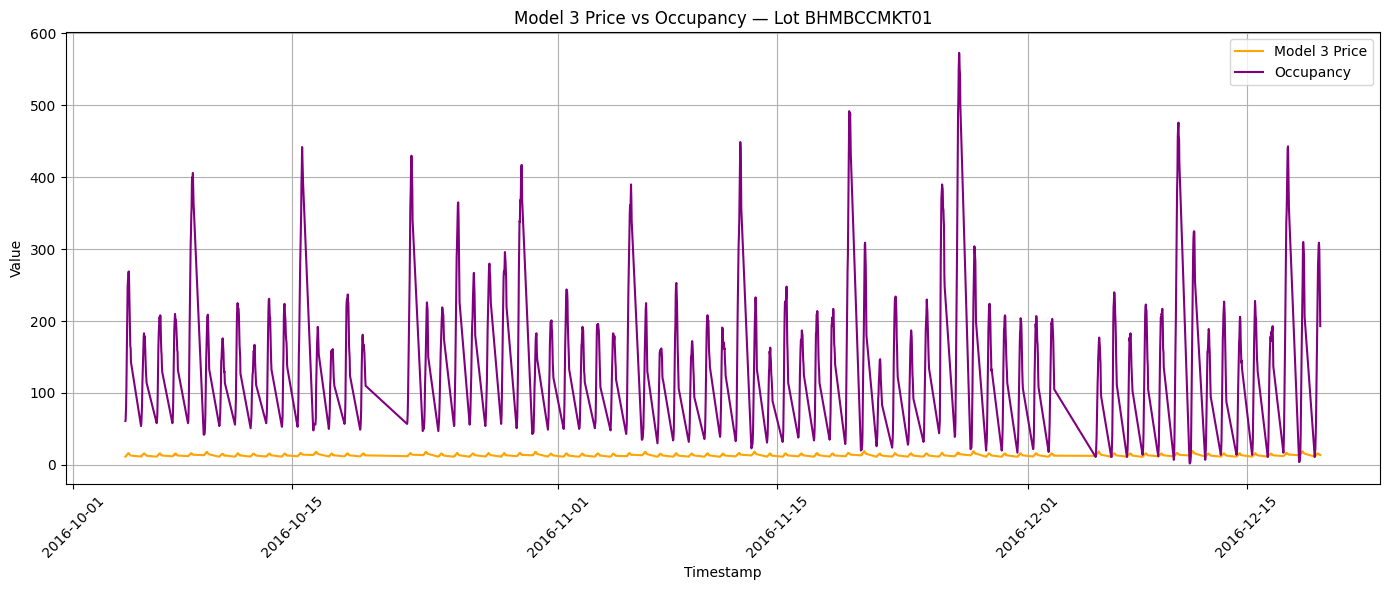

In [101]:
plt.figure(figsize=(14, 6))
plt.plot(lot_data['Timestamp'], lot_data['Model3Price'], label='Model 3 Price', color='orange')
plt.plot(lot_data['Timestamp'], lot_data['Occupancy'], label='Occupancy', color='purple')

plt.title(f"Model 3 Price vs Occupancy — Lot {sample_lot}")
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()